In [19]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("sleepdata_extracted.csv")
df.head()

,Unnamed: 0,start,end,quality,regularity,ta,tbs
0,0,0.546980,0.226935,0.849462,0.948718,0.596506,0.025976
1,1,0.694631,0.229167,0.752688,0.897436,0.473206,0.019891
2,2,0.696309,0.234375,0.763441,0.923077,0.461154,0.020318
3,3,0.919463,0.340774,0.698925,0.743590,0.417990,0.021012
4,4,0.644295,0.235863,0.709677,0.461538,0.506547,0.022702


### Separate features and target

In [21]:
df.shape[0]

908

In [22]:
X = df.iloc[:, df.columns != "quality"]
y = df["quality"]

In [23]:
X.head()

,Unnamed: 0,start,end,regularity,ta,tbs
0,0,0.546980,0.226935,0.948718,0.596506,0.025976
1,1,0.694631,0.229167,0.897436,0.473206,0.019891
2,2,0.696309,0.234375,0.923077,0.461154,0.020318
3,3,0.919463,0.340774,0.743590,0.417990,0.021012
4,4,0.644295,0.235863,0.461538,0.506547,0.022702


In [24]:
y.head()

0    0.849462
1    0.752688
2    0.763441
3    0.698925
4    0.709677
Name: quality, dtype: float64

### Train test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Train set size: 726
Test set size: 182


In [27]:
input_shape = (X.shape[1],)
input_shape

(6,)

### Training

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

In [29]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss="binary_crossentropy",

              metrics=["mae", "mse", "accuracy"])

In [30]:
validation_data = (X_test, y_test)

history = model.fit(X_train, y_train, epochs=100, validation_data=validation_data)

Epoch 1/100
23/23 [==============================] - 0s 14ms/step - loss: 5.2630 - mae: 0.2998 - mse: 0.1364 - accuracy: 0.0344 - val_loss: 0.8607 - val_mae: 0.3911 - val_mse: 0.1700 - val_accuracy: 0.0055
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.8616 - mae: 0.2582 - mse: 0.0973 - accuracy: 0.0289 - val_loss: 0.7119 - val_mae: 0.1983 - val_mse: 0.0564 - val_accuracy: 0.0549
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6418 - mae: 0.1840 - mse: 0.0486 - accuracy: 0.0331 - val_loss: 0.6345 - val_mae: 0.1806 - val_mse: 0.0479 - val_accuracy: 0.0549
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 0.6036 - mae: 0.1618 - mse: 0.0388 - accuracy: 0.0372 - val_loss: 0.6477 - val_mae: 0.2253 - val_mse: 0.0661 - val_accuracy: 0.0549
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5972 - mae: 0.1467 - mse: 0.0320 - accuracy: 0.0372 - val_loss: 0.5760 - val_mae: 0.1423 - val_mse: 0.03

In [31]:
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(mae))

In [32]:
print("Training MAE:", mae[-1])
print("Testing MAE:", val_mae[-1])

print("\nTraining MSE:", mse[-1])
print("Testing MSE:", val_mse[-1])

print("\nTraining loss:", loss[-1])
print("Testing loss:", loss[-1])

Training MAE: 0.11557615548372269
Testing MAE: 0.1530127227306366

Training MSE: 0.022010810673236847
Testing MSE: 0.03743801638484001

Training loss: 0.5592437386512756
Testing loss: 0.5592437386512756


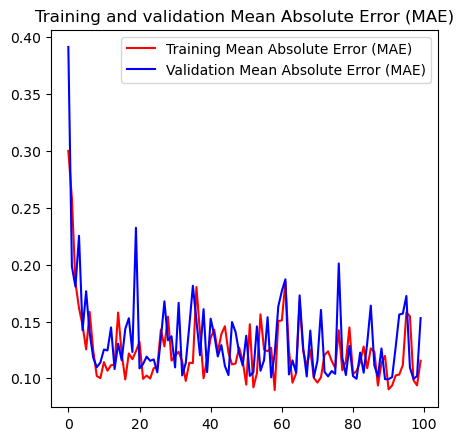

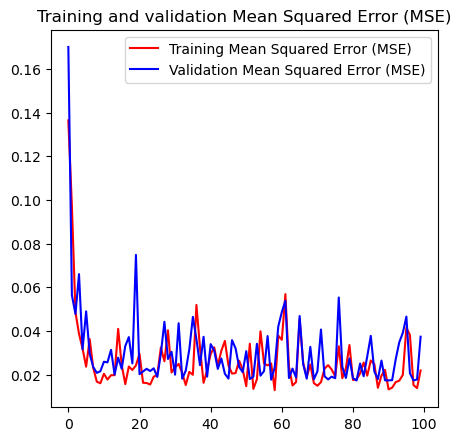

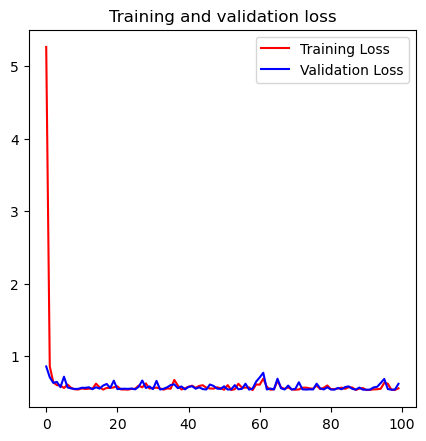

In [33]:
# MAE
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, mae, 'r', label='Training Mean Absolute Error (MAE)')
plt.plot(epochs, val_mae, 'b', label='Validation Mean Absolute Error (MAE)')
plt.title('Training and validation Mean Absolute Error (MAE)')
plt.legend()

# MSE
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, mse, 'r', label='Training Mean Squared Error (MSE)')
plt.plot(epochs, val_mse, 'b', label='Validation Mean Squared Error (MSE)')
plt.title('Training and validation Mean Squared Error (MSE)')
plt.legend()

# Loss
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [34]:
# model.save("model.h5")